<h3>BEST SALES METHOD PROJECT</h3>
<br>
<b>Coded by Atakan ÖZDİN</b>

<h3>Import Libraries</h3>

In [1]:
from warnings import filterwarnings
filterwarnings("ignore")

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import ExtraTreeRegressor
from xgboost import XGBRegressor 

In [2]:
#Function of finding best Machine Learning Algorithm 

def algo_test(x,y):
    L = LinearRegression() 
    E = ElasticNet() 
    R = Ridge() 
    Lass = Lasso() 
    ETR = ExtraTreeRegressor() 
    GBR = GradientBoostingRegressor()
    XGBC = XGBRegressor()

    x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2, random_state=13)

    algos = [L,E, R, Lass, ETR, GBR, XGBC] 
    algo_names = ['Linear', 'Elasticnet', 'Ridge', 'Lasso', 'Extra Tree', 'Gradient Boosting', 'XGradientBooting'] 
    r_squared = [] 
    rmse = [] 
    mae = []

    result = pd. DataFrame(columns = ['R_Squared', 'RMSE', 'MAE'],
                       index = algo_names)

    for algo in algos:
        algo.fit(x_train,y_train) 
        algo.predict(x_test)
        r_squared.append(r2_score(y_test, algo.predict(x_test))*100) 
        rmse.append(mean_squared_error(y_test, algo.predict(x_test))** .5) 
        mae.append(mean_absolute_error(y_test, algo.predict(x_test)))

    result.R_Squared = r_squared 
    result.RMSE = rmse 
    result.MAE = mae

    return result.sort_values('R_Squared',ascending = False)

<h3>EDA</h3>

In [3]:
data=pd.read_csv('advertising.csv')

In [4]:
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [6]:
data.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


In [7]:
X=data.iloc[0:,0:3]

In [8]:
X.shape

(200, 3)

In [9]:
X.head()

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [10]:
y=data.iloc[0:,3:4]

In [11]:
y.shape

(200, 1)

In [12]:
y.head()

,Sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9


In [13]:
#Algorithm function work
algo_test(X,y)

,R_Squared,RMSE,MAE
Gradient Boosting,97.977101,0.781622,0.610155
Extra Tree,96.917308,0.964883,0.665000
XGradientBooting,96.835494,0.977603,0.773307
Linear,93.085893,1.445033,1.180093
Ridge,93.085785,1.445044,1.180097
Elasticnet,93.051801,1.448591,1.179088
Lasso,93.002614,1.453710,1.182754


In [14]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2, random_state=13)

In [15]:
GBR = GradientBoostingRegressor()

In [16]:
model = GBR.fit(X,y)

In [17]:
y_pred = model.predict(X)

In [18]:
y_pred.shape

(200,)

In [19]:
result = pd.DataFrame()
result['RealData'] = data['Sales']
result['PredictData'] = y_pred

In [20]:
result.head()

,RealData,PredictData
0,22.1,21.928464
1,10.4,10.779677
2,9.3,9.176771
3,18.5,18.260933
4,12.9,13.323132


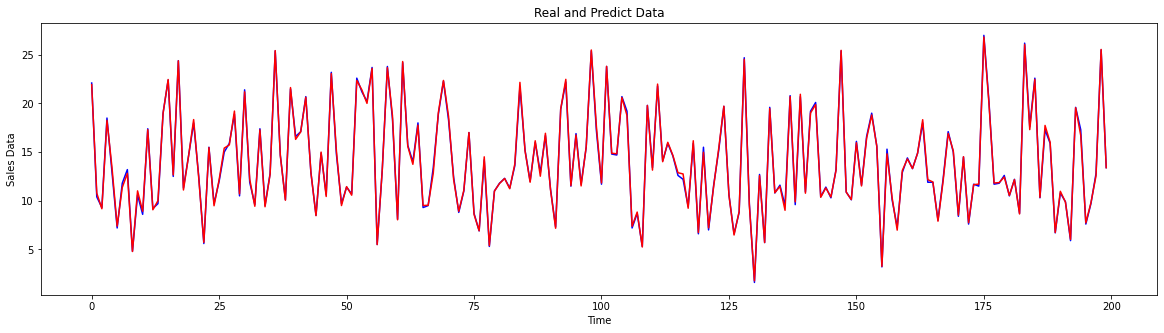

In [21]:
plt.figure(figsize=(20,5))

plt.plot(result['RealData'],color="blue") 
plt.plot(result['PredictData'],color="red")

plt.xlabel("Time")
plt.ylabel("Sales Data")
plt.title("Real and Predict Data")

plt.show()

I guessed by try-catch the best method of selling so I gave each sales method a value of 100 separately

In [22]:
df_test=pd.DataFrame({"TV":[100,0,0],
                      "Radio":[0,100,0],
                      "Newspaper":[0,0,100]})
df_test

,TV,Radio,Newspaper
0,100,0,0
1,0,100,0
2,0,0,100


In [23]:
y_pred_test= model.predict(df_test)
y_pred_test

array([9.05983065, 2.95996681, 1.98089391])

In [24]:
y_pred_table={"TV":[y_pred_test[0]],'Radio':[y_pred_test[1]],'Newspaper':[y_pred_test[2]]}
Avantage=pd.DataFrame(y_pred_table,index=['Sales'])
Avantage

,TV,Radio,Newspaper
Sales,9.059831,2.959967,1.980894


<AxesSubplot:>

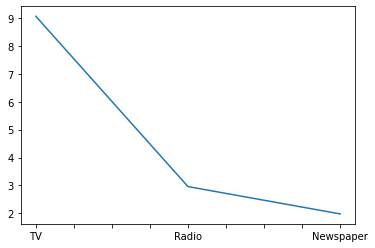

In [25]:
Avantage.iloc[0].plot()

In [26]:
max(Avantage)

'TV'

Best sales method is TV